In [ ]:
# DESAFIO - PARTE 1 (INDIVIDUAL)
# Módulo Ibiapaba - Ciência de Dados
# Prof. Wellington Franco - Aluno: Yann Lucca Miranda Martins Barros
# Campus: Universidade Federal do Ceará - Campus do Mucambinho (Sobral)

In [ ]:
!pip install nltk matplotlib

In [ ]:
import nltk
import matplotlib.pyplot as plt
import re
import spacy
import pandas as pd
import csv
import numpy as np
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# 1)Calcule os seguintes itens:
# a) Número total de palavras
# b) Número total de sentenças
# c) Número total de palavras não repetidas
# d) Número total de palavras repetidas
# e) Média de palavras por sentenças

In [ ]:
# letra a)

# Lista de peças de Shakespeare
shakespeare_plays = ["shakespeare-hamlet.txt", "shakespeare-macbeth.txt", "shakespeare-caesar.txt"]

# Função para contar o número total de palavras em um texto. Conta palavras com hífen como uma única palavra.
def count_words(text):
    words = [word.replace('-', '') for word in text if word.isalpha() or '-' in word]
    return len(words)

# Itera sobre as peças e conta palavras
for play in shakespeare_plays:
    play_name = play.replace("shakespeare-", "").replace(".txt", "").capitalize()  # Remove a extensão .txt do nome da peça
    text = gutenberg.words(play)
    num_words = count_words(text)
    print(f"O número de palavras no texto da peça {play_name} de Shakespeare é: {num_words}")

O número de palavras no texto da peça Hamlet de Shakespeare é: 30383
O número de palavras no texto da peça Macbeth de Shakespeare é: 18372
O número de palavras no texto da peça Caesar de Shakespeare é: 20878


In [ ]:
# Letra b)

# Lista de peças de Shakespeare
shakespeare_plays = ["shakespeare-hamlet.txt", "shakespeare-macbeth.txt", "shakespeare-caesar.txt"]

# Função para contar o número total de sentenças em uma peça
def count_sentences(text):
    return len(sent_tokenize(text))

# Itera sobre as peças e conta sentenças
for play in shakespeare_plays:
    play_name = play.replace("shakespeare-", "").replace(".txt", "").capitalize()
    text = gutenberg.raw(play)
    num_sentences = count_sentences(text)
    print(f"O número total de sentenças na peça {play_name} é: {num_sentences}")

O número total de sentenças na peça Hamlet é: 2355
O número total de sentenças na peça Macbeth é: 1465
O número total de sentenças na peça Caesar é: 1592


In [ ]:
# Letra c)

# Lista de peças de Shakespeare
shakespeare_plays = ["shakespeare-hamlet.txt", "shakespeare-macbeth.txt", "shakespeare-caesar.txt"]

# Função para contar o número total de palavras únicas em um texto. Considera palavras com hífen como uma única palavra.
def count_unique_words(text):
    unique_words = set([word.replace('-', '') for word in text if word.isalpha() or '-' in word])
    return len(unique_words)

# Itera sobre as peças e conta palavras únicas
for play in shakespeare_plays:
    play_name = play.replace("shakespeare-", "").replace(".txt", "").capitalize()  # Remove a extensão .txt do nome da peça
    text = gutenberg.words(play)
    num_unique_words = count_unique_words(text)
    print(f"O número de palavras únicas no texto da peça {play_name} de Shakespeare é: {num_unique_words}")

O número de palavras únicas no texto da peça Hamlet de Shakespeare é: 5431
O número de palavras únicas no texto da peça Macbeth de Shakespeare é: 4001
O número de palavras únicas no texto da peça Caesar de Shakespeare é: 3543


In [ ]:
# Letra d)

from collections import Counter

# Tive que usar a função Counter, pois sem ela o código estava mal otimizado.
# Função para contar o número total de palavras repetidas em um texto. Considera palavras com hífen como uma única palavra.
def count_duplicate_words(text):
    words = word_tokenize(text)
    words = [word.replace('-', '') for word in words if word.isalpha() or '-' in word]
    word_counter = Counter(words)
    duplicate_words = {word for word, count in word_counter.items() if count > 1}
    return len(duplicate_words)

# Itera sobre as peças e conta palavras repetidas
for play in shakespeare_plays:
    play_name = play.replace("shakespeare-", "").replace(".txt", "").capitalize()
    text = gutenberg.raw(play)
    num_duplicate_words = count_duplicate_words(text)
    print(f"O número total de palavras repetidas na peça {play_name} é: {num_duplicate_words}")

O número total de palavras repetidas na peça Hamlet é: 1954
O número total de palavras repetidas na peça Macbeth é: 1445
O número total de palavras repetidas na peça Caesar é: 1456


In [ ]:
# Letra e)

# Função para calcular a média de palavras por sentença em uma peça.
def average_words_per_sentence(text):
    sentences = sent_tokenize(text)
    words_per_sentence = [len(word_tokenize(sentence.replace('-', ''))) for sentence in sentences]
    average = sum(words_per_sentence) / len(words_per_sentence)
    return average

# Itera sobre as peças e calcula a média de palavras por sentença
for play in shakespeare_plays:
    play_name = play.replace("shakespeare-", "").replace(".txt", "")
    text = gutenberg.raw(play)
    average_words = average_words_per_sentence(text)
    print(f"A média de palavras por sentença na peça {play_name} é: {average_words:.2f}")

A média de palavras por sentença na peça hamlet é: 15.44
A média de palavras por sentença na peça macbeth é: 15.18
A média de palavras por sentença na peça caesar é: 15.86


In [ ]:
#2) Em relação ao corpus “gutenberg” implemente os algoritmos para responder às seguintes questões:
# a) Total de palavras em cada documento do corpus "gutenberg"
# b) Quem é o maior documento do corpus?
# c) Quem é o menor documento do corpus?
# d) Calcular a média da quantidade sentenças por palavras do corpus “gutenberg”.
# e) Calcule a distribuição de frequência das palavras do livro "shakespeare-macbeth.txt".
# f) Calcule 5 palavras mais frequentes nesse corpus.
# g) Mostre a diferença entre de palavras entre dois livros.(shakespeare-caesar.txt, shakespeare-hamlet.txt,)


In [ ]:
# Letra a)

# Lista de documentos no corpus gutenberg
gutenberg_documents = gutenberg.fileids()

# Função para contar o número total de palavras em um texto. Conta palavras com hífen.
def count_words(text):
    words = [word for word in text if word.isalpha() or '-' in word]
    return len(words)

# Itera sobre os documentos e conta palavras
for document in gutenberg_documents:
    document_name = document.capitalize()
    text = gutenberg.words(document)
    num_words = count_words(text)
    print(f"O número de palavras no texto do documento {document_name} é: {num_words}")

O número de palavras no texto do documento Austen-emma.txt é: 165266
O número de palavras no texto do documento Austen-persuasion.txt é: 84570
O número de palavras no texto do documento Austen-sense.txt é: 122280
O número de palavras no texto do documento Bible-kjv.txt é: 791864
O número de palavras no texto do documento Blake-poems.txt é: 6965
O número de palavras no texto do documento Bryant-stories.txt é: 47028
O número de palavras no texto do documento Burgess-busterbrown.txt é: 16427
O número de palavras no texto do documento Carroll-alice.txt é: 27738
O número de palavras no texto do documento Chesterton-ball.txt é: 83372
O número de palavras no texto do documento Chesterton-brown.txt é: 74160
O número de palavras no texto do documento Chesterton-thursday.txt é: 59234
O número de palavras no texto do documento Edgeworth-parents.txt é: 172676
O número de palavras no texto do documento Melville-moby_dick.txt é: 222630
O número de palavras no texto do documento Milton-paradise.txt é

In [ ]:
# Letra b)

# Função para contar o número total de palavras em um texto. Conta palavras com hífen.
def count_words(text):
    words = [word for word in text if word.isalpha() or '-' in word]
    return len(words)

# Encontra o documento com o maior número de palavras
max_words = 0
max_document = ""

for document in gutenberg_documents:
    text = gutenberg.words(document)
    num_words = count_words(text)

    if num_words > max_words:
        max_words = num_words
        max_document = document

print(f"O documento com o maior número de palavras é {max_document} com um total de {max_words} palavras.")

O documento com o maior número de palavras é bible-kjv.txt com um total de 791864 palavras.


In [ ]:
# Letra c)

# Função para contar o número total de palavras em um texto. Conta palavras com hífen.
def count_words(text):
    words = [word for word in text if word.isalpha() or '-' in word]
    return len(words)

# Encontra o documento com o menor número de palavras
min_words = float('inf')  # Inicializando com infinito para garantir que o primeiro documento será menor
min_document = ""

for document in gutenberg_documents:
    text = gutenberg.words(document)
    num_words = count_words(text)

    if num_words < min_words:
        min_words = num_words
        min_document = document

print(f"O documento com o menor número de palavras é {min_document} com um total de {min_words} palavras.")

O documento com o menor número de palavras é blake-poems.txt com um total de 6965 palavras.


In [ ]:
# Letra d)

# Função para calcular a média de palavras por sentença em um texto.
def average_words_per_sentence(text):
    words = [word.replace('-', '') for word in word_tokenize(text) if word.isalpha() or '-' in word]
    sentences = sent_tokenize(text)
    return len(words) / len(sentences) if sentences else 0  # Média ou 0 se não houver sentenças

# Calcula a média global (Em todo o corpus)
total_average = sum(average_words_per_sentence(gutenberg.raw(document)) for document in gutenberg_documents)
global_average = total_average / len(gutenberg_documents) if gutenberg_documents else 0

print(f"A média de palavras por sentença no corpus Gutenberg é de: {global_average:.2f}")

A média de palavras por sentença no corpus Gutenberg é de: 20.43


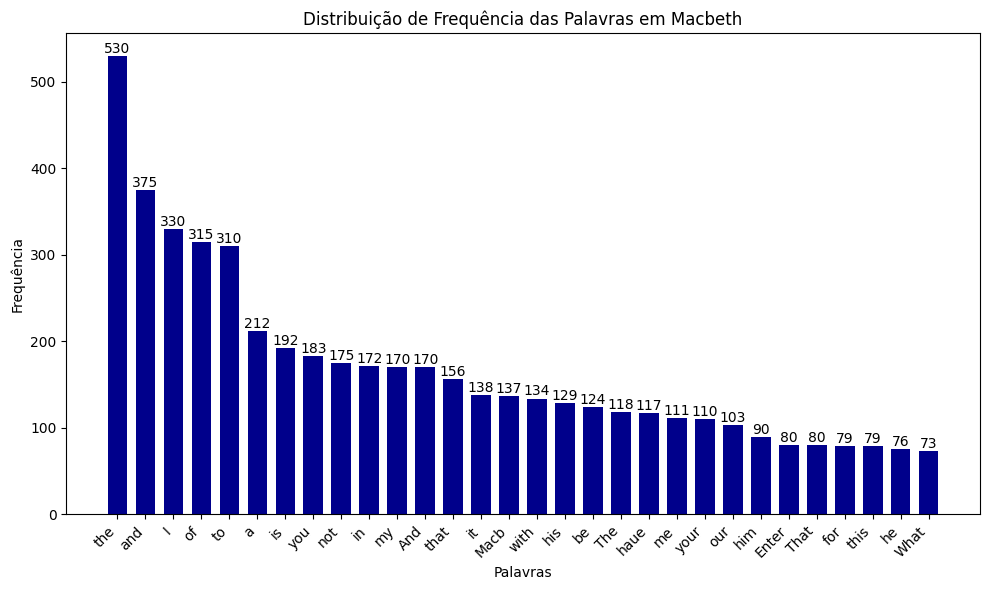

In [ ]:
# Letra e)

# Carrega o texto de "shakespeare-macbeth.txt"
macbeth_text = gutenberg.raw("shakespeare-macbeth.txt")

# Tokeniza as palavras, considerando hífen como uma única palavra
words = [word.replace('-', '') for word in word_tokenize(macbeth_text) if word.isalpha() or '-' in word]

# Calcula a distribuição de frequência das palavras | Counter foi usando novamente
word_freq = Counter(words)

# Obtem os dados para o gráfico
common_words = word_freq.most_common(30)
words, frequencies = zip(*common_words)

# Plota o gráfico de distribuição de frequência
plt.figure(figsize=(10, 6))
bars = plt.bar(words, frequencies, color='darkblue', width= 0.7)
# Adiciona o número exato de ocorrências acima das barras
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(freq), ha='center', va='bottom')
plt.title('Distribuição de Frequência das Palavras em Macbeth')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

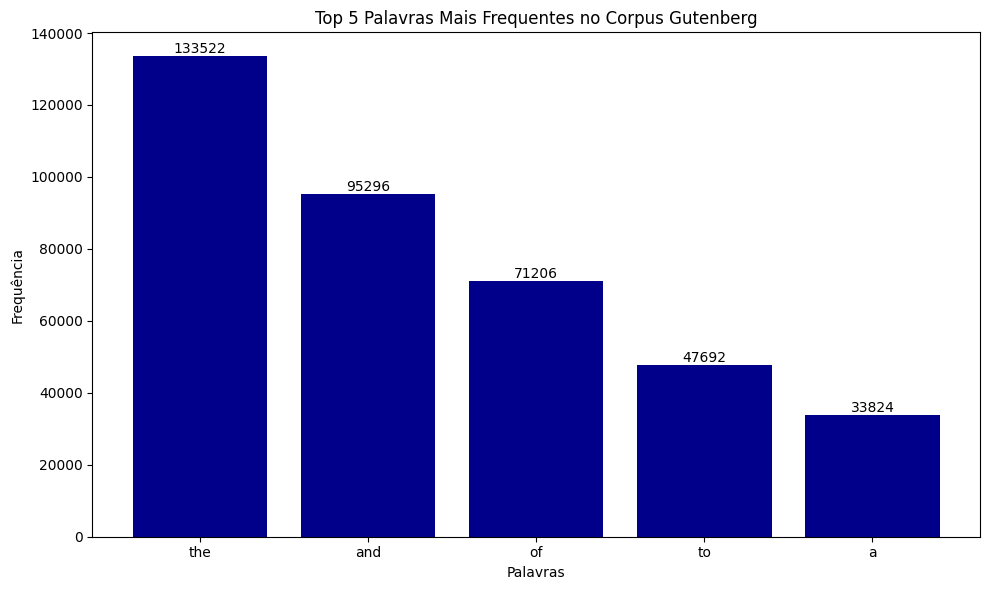

In [ ]:
# Letra f)

# Lista de todos os documentos disponíveis no corpus Gutenberg
gutenberg_documents = gutenberg.fileids()

# Tokeniza todas as palavras nos documentos, considerando hífen como uma única palavra
all_words = [word.lower().replace('-', '') for document in gutenberg_documents for word in word_tokenize(gutenberg.raw(document)) if word.isalpha()]

# Calcula a distribuição de frequência de todas as palavras
word_freq = Counter(all_words)

# Obtem as cinco palavras mais frequentes
top_five_words = word_freq.most_common(5)

# Prepara os dados para o gráfico
words, frequencies = zip(*top_five_words)

# Plota o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(words, frequencies, color='darkblue')

# Adiciona os valores acima das barras
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(freq), ha='center', va='bottom')

# Termina de plotar o gráfico
plt.title('Top 5 Palavras Mais Frequentes no Corpus Gutenberg')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [ ]:
# Letra g)

# Carrega os textos dos dois livros
caesar_text = gutenberg.raw('shakespeare-caesar.txt')
hamlet_text = gutenberg.raw('shakespeare-hamlet.txt')

# Tokeniza as palavras nos textos, considerando hífen como uma única palavra!
caesar_words = [word.lower().replace('-', '') for word in word_tokenize(caesar_text) if word.replace('-', '').isalpha()]
hamlet_words = [word.lower().replace('-', '') for word in word_tokenize(hamlet_text) if word.replace('-', '').isalpha()]

# Calcula a quantidade de palavras em cada livro
num_words_caesar = len(caesar_words)
num_words_hamlet = len(hamlet_words)

# Calcula a diferença na quantidade de palavras
difference_in_words = abs(num_words_caesar - num_words_hamlet)

# Imprime o resultado
print(f"A diferença na quantidade de palavras entre 'shakespeare-caesar.txt' e 'shakespeare-hamlet.txt' é de: {difference_in_words} palavras.")

A diferença na quantidade de palavras entre 'shakespeare-caesar.txt' e 'shakespeare-hamlet.txt' é de: 9096 palavras.


In [ ]:
# 3) Para o corpus “shakespeare-caesar.txt”, usando expressões regulares responda os seguintes itens:
# a) Quantidades de palavras que terminam com “r”;
# b) Quantidade de palavras com 5 letras;
# c) Quantidade de vezes que “err” ocorre no corpus;
# d) Quantidade de vezes que “are” ocorre no corpus para as palavras com 5 ou mais caracteres.

In [ ]:
# a) Quantidades de palavras que terminam com “r”.

# Carrega o texto da peça "shakespeare-caesar.txt"
caesar_text = gutenberg.raw('shakespeare-caesar.txt')

# Função para calcular a quantidade de palavras que terminam com o caractere "r"
def count_words_ending_with_r(text):
    words = [word.lower().replace('-', '') for word in word_tokenize(text) if word.replace('-', '').isalpha()]
    words_ending_with_r = [word for word in words if re.search(r'r$', word)]
    return len(words_ending_with_r)

# Calcula a quantidade de palavras que terminam com o caractere "r" na peça Caesar
num_words_caesar_r = count_words_ending_with_r(caesar_text)

# Imprime o resultado
print(f"A quantidade de palavras que terminam com o caractere 'r' na peça Ceaser de Shakespeare ('shakespeare-caesar.txt') é de: {num_words_caesar_r} palavras.")


A quantidade de palavras que terminam com o caractere 'r' na peça Ceaser de Shakespeare ('shakespeare-caesar.txt') é de: 1316 palavras.


In [ ]:
# b) Quantidade de palavras com 5 letras;

# Carrega o texto da peça "Julius Caesar" de Shakespeare
caesar_text = gutenberg.raw('shakespeare-caesar.txt')

# Função para calcular a quantidade de palavras com 5 letras
def count_words_with_five_letters(text):
    words = [word.lower().replace('-', '') for word in word_tokenize(text) if word.replace('-', '').isalpha()]
    words_with_five_letters = [word for word in words if re.match(r'^\b\w{5}\b$', word)]
    return len(words_with_five_letters)

# Calcula a quantidade de palavras com 5 letras na peça Caesar
num_words_caesar_five_letters = count_words_with_five_letters(caesar_text)

# Imprime o resultado
print(f"A quantidade de palavras com 5 letras na peça Julius Caesar de Shakespeare ('shakespeare-caesar.txt') é de: {num_words_caesar_five_letters} palavras.")

A quantidade de palavras com 5 letras na peça Julius Caesar de Shakespeare ('shakespeare-caesar.txt') é de: 2903 palavras.


In [ ]:
# c) Quantidade de vezes que “err” ocorre no corpus

# Carrega o texto da peça "Julius Caesar" de Shakespeare
caesar_text = gutenberg.raw('shakespeare-caesar.txt')

# Função para contar a quantidade de vezes que "err" ocorre em um texto
def count_err_occurrences(text):
    return len(re.findall(r'\berr\b', text.lower()))

# Conta as ocorrências de "err" na peça Caesar
num_err_occurrences_caesar = count_err_occurrences(caesar_text)

# Imprime o resultado
print(f"A sequência 'err' ocorre {num_err_occurrences_caesar} vezes na peça Julius Caesar de Shakespeare ('shakespeare-caesar.txt').")


A sequência 'err' ocorre 0 vezes na peça Julius Caesar de Shakespeare ('shakespeare-caesar.txt').


In [ ]:
# d) Quantidade de vezes que “are” ocorre no corpus para as palavras com 5 ou mais caracteres.

# Carrega o texto da peça "Julius Caesar" de Shakespeare
caesar_text = gutenberg.raw('shakespeare-caesar.txt')

# Função para contar a quantidade de vezes que a sequência "are" ocorre em palavras com 5 ou mais caracteres, considerando hífens
def count_are_occurrences(text):
    words = [word.lower() for word in word_tokenize(text) if re.sub(r'[^A-Za-z-]', '', word).isalpha() and len(re.sub(r'[^A-Za-z-]', '', word)) >= 5]
    are_occurrences = [word for word in words if re.search(r'are', word)]
    return len(are_occurrences)

# Calcula a quantidade de vezes que "are" ocorre em palavras com 5 ou mais caracteres na peça Caesar
num_are_occurrences_caesar = count_are_occurrences(caesar_text)

# Imprime o resultado
print(f"A sequência 'are' ocorre {num_are_occurrences_caesar} vezes em palavras com 5 ou mais caracteres(considerando hífens) na peça Julius Caesar de Shakespeare ('shakespeare-caesar.txt').")

A sequência 'are' ocorre 172 vezes em palavras com 5 ou mais caracteres(considerando hífens) na peça Julius Caesar de Shakespeare ('shakespeare-caesar.txt').


In [ ]:
# 4) Em relação do corpus “shakespeare-hamlet.txt”, faça as seguintes atividades:
# a) Normalize o corpus (Retire os números e deixe todas as palavras minúsculas);
# b) Aplique o lematizador em todas as palavras do corpus;
# c) Aplique o tokenizador em todas as sentenças do corpus;
# d) Aplique os pos tagger e responda a quantidade de adjetivos existem no corpus; Dica a tag de adjetivo é “JJ”


In [ ]:
# a) Normalize o corpus (Retire os números e deixe todas as palavras minúsculas);

# Carrega o texto da peça "Hamlet" de Shakespeare
hamlet_text = gutenberg.raw('shakespeare-hamlet.txt')

# Função para normalizar o texto (remover números e converter para minúsculas)
def normalize_text(text):
    text_without_numbers = re.sub(r'\d+', '', text)  # Remove números
    normalized_text = text_without_numbers.lower()  # Converte para minúsculas
    return normalized_text

# Normaliza o texto da peça Hamlet
normalized_hamlet_text = normalize_text(hamlet_text)

# Imprime parte do texto normalizado para visualização
print(normalized_hamlet_text[:700])  # Imprime os primeiros 700 caracteres para visualização

[the tragedie of hamlet by william shakespeare ]


actus primus. scoena prima.

enter barnardo and francisco two centinels.

  barnardo. who's there?
  fran. nay answer me: stand & vnfold
your selfe

   bar. long liue the king

   fran. barnardo?
  bar. he

   fran. you come most carefully vpon your houre

   bar. 'tis now strook twelue, get thee to bed francisco

   fran. for this releefe much thankes: 'tis bitter cold,
and i am sicke at heart

   barn. haue you had quiet guard?
  fran. not a mouse stirring

   barn. well, goodnight. if you do meet horatio and
marcellus, the riuals of my watch, bid them make hast.
enter horatio and marcellus.

  fran. i thinke i heare them. stand: who's the


In [ ]:
# b) Aplique o lematizador em todas as palavras do corpus

# Carrega o texto normalizado da peça "Hamlet" de Shakespeare
normalized_hamlet_text = gutenberg.raw('shakespeare-hamlet.txt')

# Função para lematizar todas as palavras no texto
def lemmatize_text_all_words(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

# Aplica lematização a todas as palavras no texto normalizado
lemmatized_hamlet_text = lemmatize_text_all_words(normalized_hamlet_text)

# Imprime parte do texto lematizado para visualização
print(lemmatized_hamlet_text[:500])  # Imprime os primeiros 500 caracteres lematizados para visualização

[ The Tragedie of Hamlet by William Shakespeare 1599 ] Actus Primus . Scoena Prima . Enter Barnardo and Francisco two Centinels . Barnardo . Who 's there ? Fran . Nay answer me : Stand & vnfold your selfe Bar . Long liue the King Fran . Barnardo ? Bar . He Fran . You come most carefully vpon your houre Bar . 'T is now strook twelue , get thee to bed Francisco Fran . For this releefe much thankes : 'T is bitter cold , And I am sicke at heart Barn . Haue you had quiet Guard ? Fran . Not a Mouse st


In [ ]:
# c) Aplique o tokenizador em todas as sentenças do corpus

# Tokenização de sentenças no texto lematizado
sentences = sent_tokenize(lemmatized_hamlet_text)

# Imprime algumas sentenças tokenizadas para visualização
for i in range(7):  # Imprime as sete primeiras sentenças como exemplo
    print(f"Sentença {i + 1}: {sentences[i]}")

Sentença 1: [ The Tragedie of Hamlet by William Shakespeare 1599 ] Actus Primus .
Sentença 2: Scoena Prima .
Sentença 3: Enter Barnardo and Francisco two Centinels .
Sentença 4: Barnardo .
Sentença 5: Who 's there ?
Sentença 6: Fran .
Sentença 7: Nay answer me : Stand & vnfold your selfe Bar .


In [ ]:
# Tokenização de palavras no texto lematizado
words = word_tokenize(lemmatized_hamlet_text)

# Aplicar POS Tagger para identificar as tags gramaticais
pos_tags = pos_tag(words)

# Contar a quantidade de adjetivos (tags "JJ")
adjective_count = sum(1 for word, tag in pos_tags if tag == 'JJ')

# Imprimir a quantidade de adjetivos encontrados
print(f"A quantidade de adjetivos no corpus de Hamlet é: {adjective_count}")

A quantidade de adjetivos no corpus de Hamlet é: 1679


In [ ]:
# 5) Retire as stopwords dos seguintes textos:
# a) shakespeare-caesar.txt
# b) shakespeare-hamlet.txt
# c) Qual é a quantidade de palavras restantes em cada texto?

In [ ]:
# Por serem pequenas implementações, respondi as 3 letraas da 5) no mesmo código.

# Carrega os textos de Hamlet e Caesar
hamlet_text = gutenberg.raw('shakespeare-hamlet.txt')
caesar_text = gutenberg.raw('shakespeare-caesar.txt')

# Substitui hifens por uma string vazia nos textos
hamlet_text = hamlet_text.replace('-', '')
caesar_text = caesar_text.replace('-', '')

# Faz a Tokenização das palavras nos textos
hamlet_words = word_tokenize(hamlet_text)
caesar_words = word_tokenize(caesar_text)

# Remove as stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(words):
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

hamlet_filtered_words = remove_stopwords(hamlet_words)
caesar_filtered_words = remove_stopwords(caesar_words)

# Conta a quantidade de palavras restantes em cada texto
hamlet_word_count = len(hamlet_filtered_words)
caesar_word_count = len(caesar_filtered_words)

# Imprime os resultados
print(f"A quantidade de palavras restantes em Hamlet é de: {hamlet_word_count} palavras.")
print(f"A quantidade de palavras restantes em Caesar é de: {caesar_word_count} palavras.")

A quantidade de palavras restantes em Hamlet é de: 22463 palavras.
A quantidade de palavras restantes em Caesar é de: 15786 palavras.


In [ ]:
# 6) Encontre as entidades nomeada presentes para o seguintes textos: apoloxi.txt e french-revolution.txt
# a) Qual é a quantidade de entidades "GPE" presentes em cada um dos texto?
# b) Qual é a quantidade de entidades "LOCATION" presentes em cada um dos texto?
# c) Qual é a quantidade de entidades "PERSON" presentes em cada um dos texto?

In [ ]:
# Essas funções serão usadas nas letras da 6º questão
with open('apoloxi.txt', 'r') as archive:
    apoloxi = archive.read()

with open('french-revolution.txt', 'r') as archive:
    french = archive.read()

# Colocando em inglês
nlp = spacy.load('en_core_web_sm')

# Processa o texto com spaCy apoloxi
apoloxi_doc = nlp(apoloxi)
french_doc = nlp(french)

In [ ]:
# a) Qual é a quantidade de entidades "GPE" presentes em cada um dos texto?

# Extrai e conta aquantidade de entidades GPE
apoloxi_gpe_entity = [entity.text for entity in apoloxi_doc.ents if entity.label_ == 'GPE']
print(f"A quatidade de entidades GPE presentes em Apoloxi é de: {len(apoloxi_gpe_entity)} entidades")

french_gpe_entity = [entity.text for entity in french_doc.ents if entity.label_ == 'GPE']
print(f"A quatidade de entidades GPE presentes em French Revolution é de: {len(french_gpe_entity)} entidades")

A quatidade de entidades GPE presentes em Apoloxi é de: 3 entidades
A quatidade de entidades GPE presentes em French Revolution é de: 34 entidades


In [ ]:
# b) Qual é a quantidade de entidades "LOCATION" presentes em cada um dos texto?

# Extrai e conta aquantidade de entidades LOCATION
apoloxi_loc_entity = [entity.text for entity in apoloxi_doc.ents if entity.label_ == 'LOCATION']
print(f"A quatidade de entidades LOCATION presentes em Apoloxi é de: {len(apoloxi_loc_entity)} entidades")

frenchre_loc_entity = [entity.text for entity in french_doc.ents if entity.label_ == 'LOCATION']
print(f"A quatidade de entidades LOCATION presentes em French Revolution é de: {len(frenchre_loc_entity)} entidades")

A quatidade de entidades LOCATION presentes em Apoloxi é de: 0 entidades
A quatidade de entidades LOCATION presentes em French Revolution é de: 0 entidades


In [ ]:
# c) Qual é a quantidade de entidades "PERSON" presentes em cada um dos texto?

# Extrai e conta aquantidade de entidades PERSON
apoloxi_person_entity = [entity.text for entity in apoloxi_doc.ents if entity.label_ ==  'PERSON']
print(f"A quatidade de entidades PERSON presentes em Apoloxi é de: {len(apoloxi_person_entity)} entidades")

frenchre_person_entity = [entity.text for entity in french_doc.ents if entity.label_ == 'PERSON']
print(f"A quatidade de entidades PERSON presentes em French Revolution é de: {len(frenchre_person_entity)} entidades")

A quatidade de entidades PERSON presentes em Apoloxi é de: 11 entidades
A quatidade de entidades PERSON presentes em French Revolution é de: 2 entidades


In [ ]:
# 7) Utililizando as técnicas aprendidas sobre análise de sentimentos defina a polaridade do arquivo ‘reviews”. Utiliza os arquivos
# positive_words.txt e negative_words.txt presentes na pasta.

In [ ]:
# Faz o upload dos arquivos disponibilizados
positive = []
with open("positive_words.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        positive.append(row[0])

negative = []
with open("negative_words.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        negative.append(row[0])

comments = []
with open("reviews.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        comments.append(row[0])

# Divide o texto em sentenças e o tokeniza, em seguida analisa a polaridade usando os arquivos fornecidos
# e atribui uma pontuação com base na analise (e com base nos documentos).
def sentiment(text):
    temp = []
    text_sent = nltk.sent_tokenize(text)
    for sentence in text_sent:
        n_count = 0
        p_count = 0
        sent_words = nltk.word_tokenize(sentence)
        for word in sent_words:
            if word in positive:
                p_count += 1
            elif word in negative:
                n_count += 1
        if p_count > 0 and n_count == 0:
            temp.append(1)
        elif n_count % 2 > 0:
            temp.append(-1)
        elif n_count % 2 == 0 and n_count > 0:
            temp.append(1)
        else:
            temp.append(0)
    return temp

def classification(score):
    polarity_classification = 'Positiva' if score > 0 else ('Negativa' if score < 0 else 'Neutra')
    return polarity_classification

# Armazena as notas de cada sentença
scores = []

for review in comments:
    scores.append(np.average(sentiment(str(review))))
    polarity = classification(np.average(sentiment(str(review))))
    print(f"A nota é {np.average(sentiment(str(review)))}, portanto é {polarity}.\n")

# Calcula a média das notas do arquivo
nota_media = np.mean(scores)

# Classifica a polaridade global
classificacao_global = classification(nota_media)

# Exibe a nota média e a classificação global
print(f"Nota Média: {nota_media}")
print(f"Classificação Global: {classificacao_global}")

# Adiciona as notas ao DataFrame
df = pd.DataFrame({'Review': comments, 'Polarity Score': scores})
df['Polarity Classification'] = df['Polarity Score'].apply(classification)

# Exibe o DataFrame
print(df)


A nota é 0.6, portanto é Positiva.

A nota é 0.875, portanto é Positiva.

A nota é 0.6666666666666666, portanto é Positiva.

A nota é 0.18181818181818182, portanto é Positiva.

A nota é 0.2857142857142857, portanto é Positiva.

A nota é -0.2857142857142857, portanto é Negativa.

A nota é 0.0, portanto é Neutra.

A nota é 0.45454545454545453, portanto é Positiva.

Nota Média: 0.34725378787878786
Classificação Global: Positiva
                                              Review  Polarity Score  \
0  This camera is perfect for an enthusiastic ama...        0.600000   
1  I got my camera three days back, and although ...        0.875000   
2  I love photography. I had an older camera that...        0.666667   
3  I bought coolpix 4300 two months after i had b...        0.181818   
4  The other reviewers have clearly pointed all t...        0.285714   
5  Within a year, there are problems with my menu...       -0.285714   
6  Got a "system error" problem 30 days after pur...        0.00000